# Gradiente

In [1]:
from sympy import symbols, diff, Plane, Point3D, cos, sin, Eq, Line, Point, exp, sqrt
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d, plot3d_parametric_line
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = 12, 6

In [3]:
def plot_surface(f, n=300, lims=5):
    f_ = lambdify((x, y), f)
    X = np.linspace(-lims, lims, n)
    Y = np.linspace(-lims, lims, n)
    X, Y = np.meshgrid(X, Y)
    Z = f_(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    return fig, ax, surf

In [4]:
def gradient_descent(f, p, step=0.1 , tol=0.0001, n=200):
    x_0, y_0 = p
    pdiv1 = diff(f, x)
    pdiv2 = diff(f, y)
    dif = 20
    ns = 0
    steps = [(float(x_0), float(y_0))]
    z_0 = float(f.subs(([x, x_0], [y, y_0])))
    vals = [z_0]
    
    while dif > tol and ns < n:    
        
        grad1 = float(pdiv1.subs(([x, x_0], [y, y_0])))
        grad2 = float(pdiv2.subs(([x, x_0], [y, y_0])))
        dir1 = x_0 + step*grad1
        dir2 = y_0 + step*grad2
        z = float(f.subs(([x, dir1], [y, dir2])))
        dif = np.abs(z_0 - z)
        steps.append((float(dir1), float(dir2)))
        vals.append(z)
        x_0 = dir1
        y_0 = dir2
        z_0 = z
        ns  += 1
    return steps, vals

In [5]:
def plot_contour(f, p, n=1000, r=5):
    x0, y0 = p
    f_ = lambdify((x, y), f)
    X = np.linspace(x0-r, x0+r, n)
    Y = np.linspace(y0-r, y0+r, n)
    X, Y = np.meshgrid(X, Y)
    Z = f_(X, Y)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.show()

In [6]:
def plot_path(f, steps, n=100):
    x0, y0 = steps[-1]
    x1, y1 = steps[0]
    r = np.round(np.sqrt((x0 - x1)**2 + (y0 - y1)**2 )) + 1

    f_ = lambdify((x, y), f)
    X = np.linspace(x0-r, x0+r, n)
    Y = np.linspace(y0-r, y0+r, n)
    X, Y = np.meshgrid(X, Y)
    Z = f_(X, Y)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X, Y, Z)
    fig.colorbar(cp) # Add a colorbar to a plot
    
    
    X = [t[0] for t in steps]
    Y = [t[1] for t in steps]
    ax.plot(X, Y, c='#EE774E')
    ax.scatter(X, Y, c='#EE774E')
    plt.show()

In [7]:
def random_path(f, p, step=0.1, cooling=1, tol=0.001, n=100):
    x_0, y_0 = p
    dif = 20
    ns = 0
    steps = [(float(x_0), float(y_0))]
    z_0 = float(f.subs(([x, x_0], [y, y_0])))
    vals = [z_0]
    
    while dif > tol and ns < n:
        vdir = np.random.uniform(-1,1,2)
        vdir /= np.sqrt(np.dot(vdir,vdir))
        dir1 = x_0 + step*vdir[0]
        dir2 = y_0 + step*vdir[1]
        z = float(f.subs(([x, dir1], [y, dir2])))
        if z > z_0:
            dif = np.abs(z_0 - z)
            steps.append((float(dir1), float(dir2)))
            x_0 = dir1
            y_0 = dir2
            z_0 = z
            step *= cooling
            vals.append(z)
        ns+=1
        
    return steps, vals

### Comentarios

Sea función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ una función diferenciable en un punto $a\in \mathbb{R}^n$, al vector 
$$\nabla f = \left(\frac{\partial f}{\partial x_1}, \ldots, \frac{\partial f}{\partial x_n} \right)$$
se le conoce como vector **gradiente** (cada $\frac{\partial f}{\partial x_i}$, están evaluadas en $a$).

En clase aprendimos que si $v$ es un vector unitario en $\mathbb{R}^n$, entonces, la derivada direcciónal en $a$ satisface
$$ f'(a; v) = \nabla f(a) \cdot v$$

A su vez, el ángulo $\theta$ entre los vectores $\nabla f(a) $ y $v$ satisface
$$\cos(\theta) = \frac{\nabla f(a) \cdot v}{\lVert  \nabla f(a) \lVert \lVert v \lVert}. $$

Entonces, $ \nabla f(a) \cdot v = \lVert  \nabla f(a) \lVert \cos(\theta).$ Esto implica que, $ \nabla f(a) \cdot v$ es máximo, cuando el $\theta = 0$. Es decir, la dirección de máximo crecimiento de $f$ se da en la dirección del gradiente. 

Comprobemos esto con los siguientes ejemplos.

### Descenso por gradiente

### Ejemplo 1 $f(x, y) = -x^2 - y^2$

In [8]:
x, y, t = symbols('x y t')

In [9]:
f = -x*x - y*y

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7ff6effd4a20>)

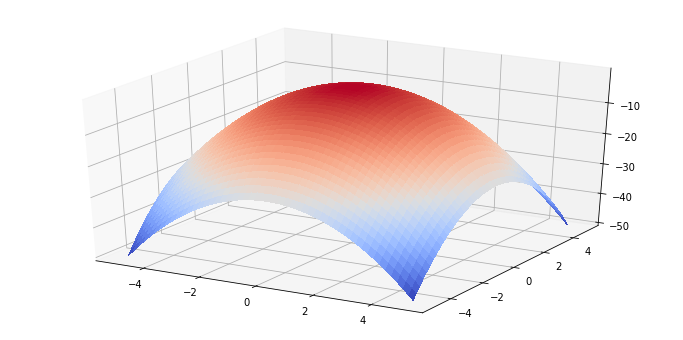

In [10]:
plot_surface(f)

Grafica de contorno


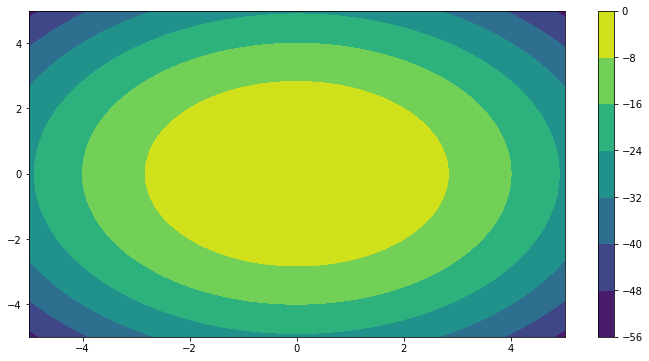

In [11]:
print("Grafica de contorno")
plot_contour(f, (0,0))

In [12]:
p1, v1 = gradient_descent(f, (2,-3))

In [13]:
p2, v2 = random_path(f, (2, -3), step=1)

Ascenso por gradiente


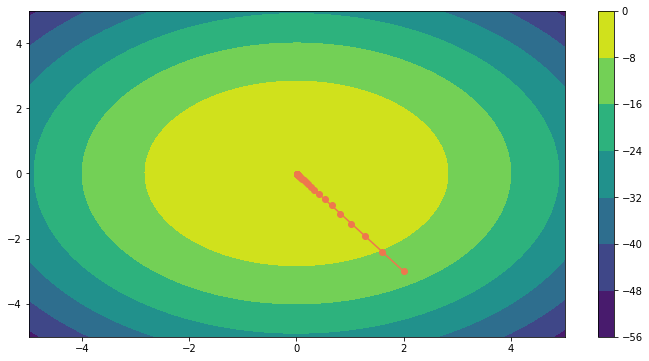

In [14]:
print("Ascenso por gradiente")
plot_path(f, p1)

Ascenso aleatorio


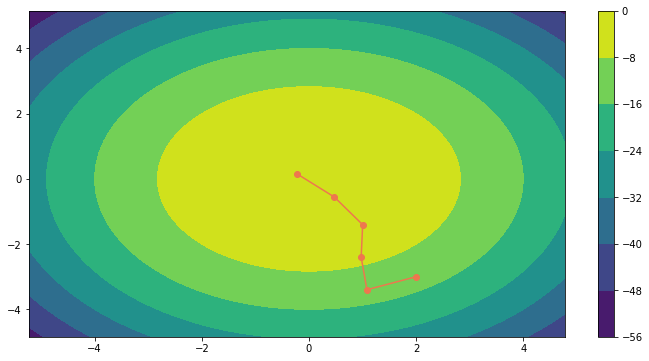

In [15]:
print("Ascenso aleatorio")
plot_path(f, p2)

## Ejemplo 2: $g(x, y) = \sin(x)\cos(y)$

In [16]:
g = sin(x) * cos(y)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7ff6f0913b00>)

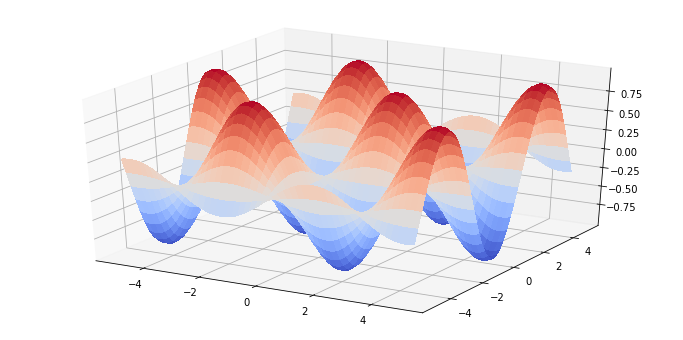

In [17]:
plot_surface(g)

Grafica de contorno


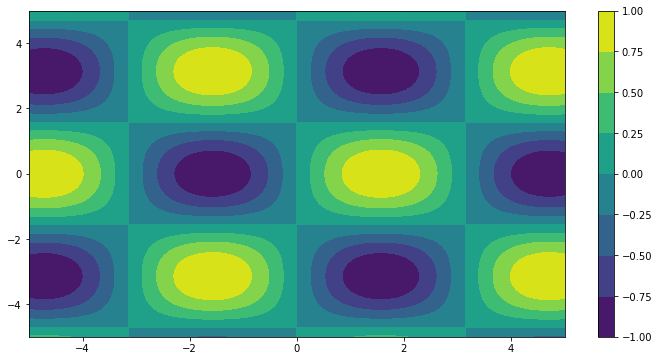

In [18]:
print("Grafica de contorno")
plot_contour(g, (0,0))

In [19]:
p1, v1 = gradient_descent(g, (2,-3))


In [20]:
p2, v2 = random_path(g, (2, -3))

Ascenso por gradiente


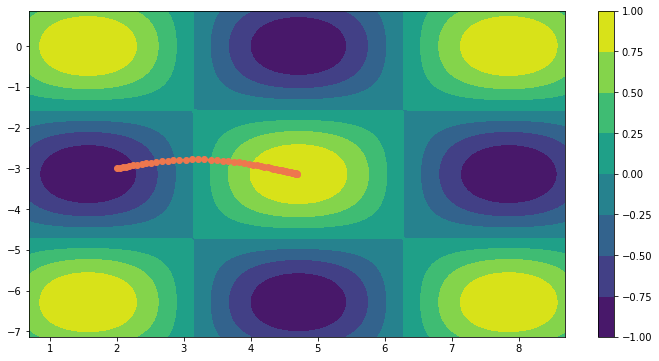

In [21]:
print("Ascenso por gradiente")
plot_path(g, p1)

Ascenso aleatorio


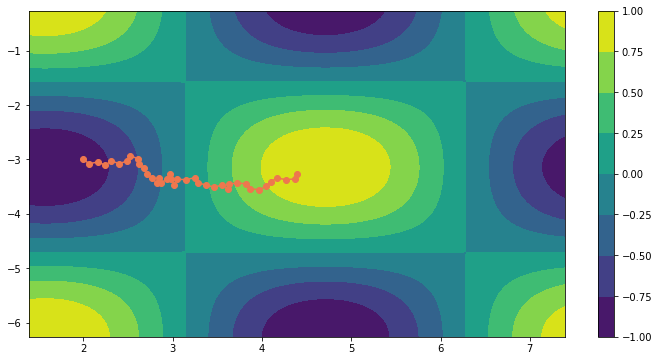

In [22]:
print("Ascenso aleatorio")
plot_path(g, p2)

## Ejemplo 3: $f(x, y) = \frac{1}{1+ x^2 + y^2}$

In [23]:
f = 1 / (x*x + y*y + 1)

In [24]:
f

1/(x**2 + y**2 + 1)

(<Figure size 864x432 with 1 Axes>,
 <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7ff6f4579630>)

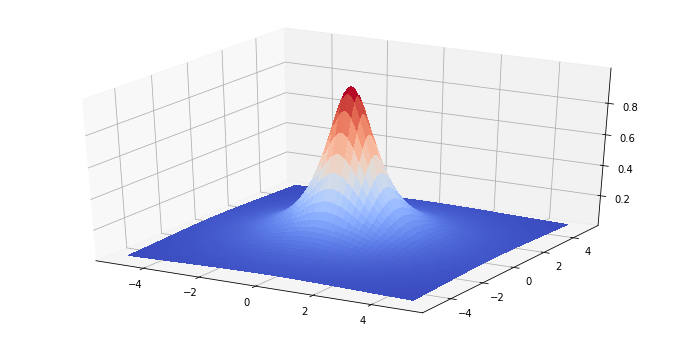

In [25]:
plot_surface(f)

Grafica de contorno


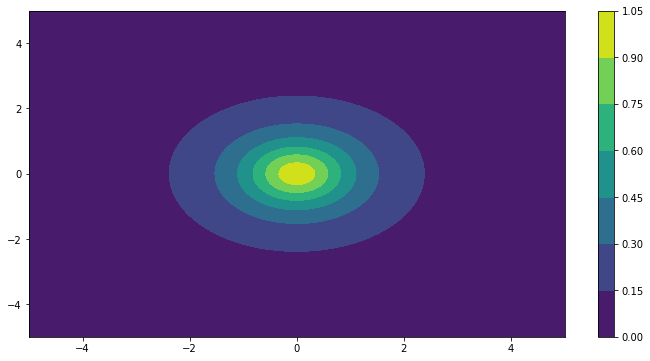

In [26]:
print("Grafica de contorno")
plot_contour(f, (0,0))

In [27]:
p1, v1 = gradient_descent(f, (-3, 0), step=0.9)

In [28]:
p2, v2 = random_path(f, (-3, 0), step=0.9)

Ascenso por gradiente


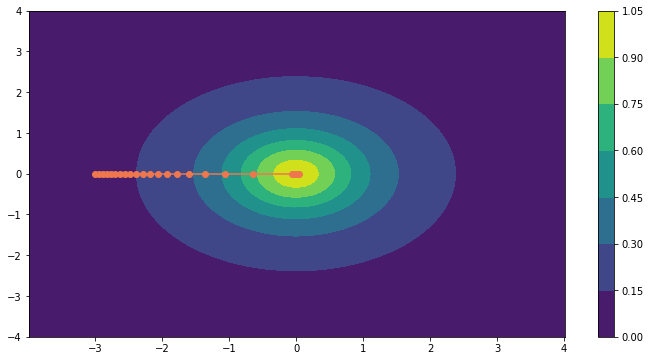

In [29]:
print("Ascenso por gradiente")
plot_path(f, p1)

Ascenso aleatorio


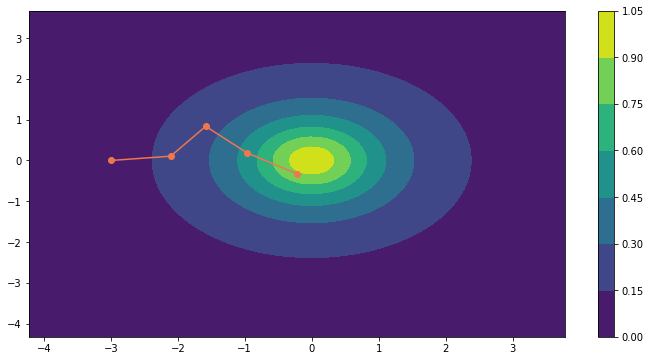

In [30]:
print("Ascenso aleatorio")
plot_path(f, p2)